# DATA IMPORT

In [8]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#df = pd.read_csv('cardio_data_processed.csv')

In [ ]:
myvars = {}
with open("dcherui-mysql-password_copy") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

myvars.keys()

import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()

df = pd.read_sql_query('''select * from cardio_data_processed_csv_zip''', conn)
df.head()

# Data Description

In [42]:
r,c = df.shape
print(r,c)

68205 20


In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,age_years_no_outliers,bmi_no_outliers,bmi_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,2,50.0,21.967120,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,3,55.0,34.927679,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,2,51.0,23.507805,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,3,48.0,28.710479,2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,0,47.0,23.011177,1


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded,age_years_no_outliers,bmi_no_outliers,bmi_category
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513,1.912059,52.825027,26.951597,1.921472
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497,0.907570,6.767501,4.341622,0.895625
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784,0.000000,39.000000,14.524328,0.000000
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,2.000000,48.000000,23.875115,1.000000
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494,2.000000,53.000000,26.346494,2.000000
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213,2.000000,58.000000,29.642685,2.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667,3.000000,64.000000,39.476813,4.000000


In [7]:
column_dtypes = df.dtypes
print(column_dtypes)

id                         int64
age                        int64
gender                     int64
height                     int64
weight                   float64
ap_hi                      int64
ap_lo                      int64
cholesterol                int64
gluc                       int64
smoke                      int64
alco                       int64
active                     int64
cardio                     int64
age_years                  int64
bmi                      float64
bp_category               object
bp_category_encoded        int64
age_years_no_outliers    float64
bmi_no_outliers          float64
bmi_category               int64
dtype: object


In [8]:
print(df.isna().sum())
print("\nDuplicate values:")
print(df.duplicated().sum())

id                       0
age                      0
gender                   0
height                   0
weight                   0
ap_hi                    0
ap_lo                    0
cholesterol              0
gluc                     0
smoke                    0
alco                     0
active                   0
cardio                   0
age_years                0
bmi                      0
bp_category              0
bp_category_encoded      0
age_years_no_outliers    0
bmi_no_outliers          0
bmi_category             0
dtype: int64

Duplicate values:
0


In [9]:
df.drop_duplicates(keep='first', inplace=True)

# Descriptive statistics for categorical data

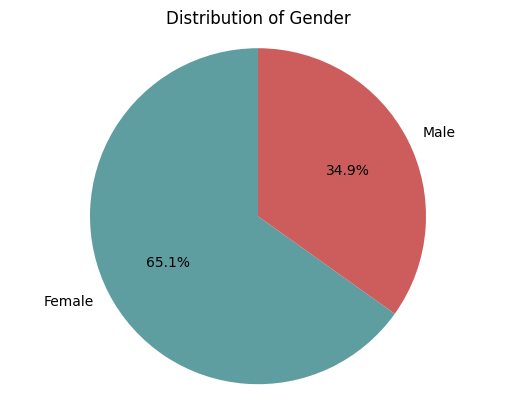

In [10]:
gender_counts = df['gender'].value_counts()
labels = ['Female', 'Male']
colors= [ 'cadetblue', 'indianred']
plt.pie(gender_counts, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Gender')
plt.show()

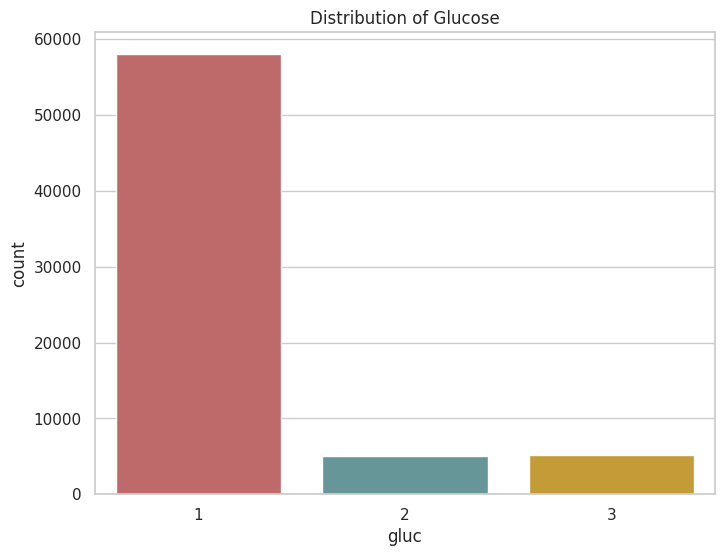

In [11]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("Set2")[:3] 
plt.figure(figsize=(8, 6))
colors= ['indianred', 'cadetblue', 'goldenrod']
sns.countplot(x='gluc', data=df, hue='gluc', palette=colors, legend=False)
plt.title('Distribution of Glucose')
plt.show()

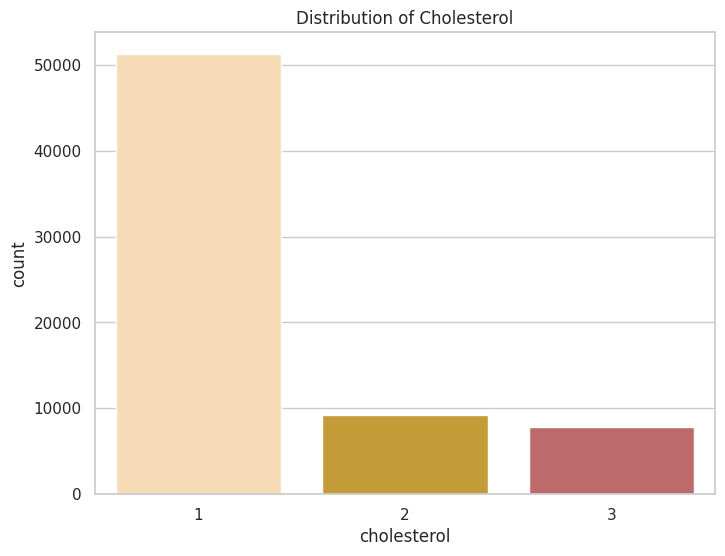

In [12]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("pastel")[:3] 
plt.figure(figsize=(8, 6))
colors= ['navajowhite', 'goldenrod', 'indianred']
sns.countplot(x='cholesterol', data=df, hue='cholesterol', palette=colors, legend=False)
plt.title('Distribution of Cholesterol')
plt.show()

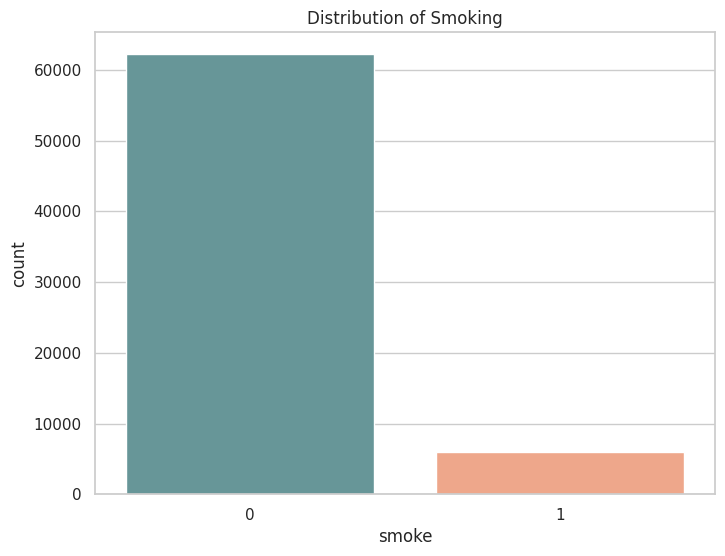

In [13]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("Set2")[:2]  
plt.figure(figsize=(8, 6))
colors= ['cadetblue', 'lightsalmon']
sns.countplot(x='smoke', hue='smoke', data=df, palette= colors, legend=False)
plt.title('Distribution of Smoking')
plt.show()

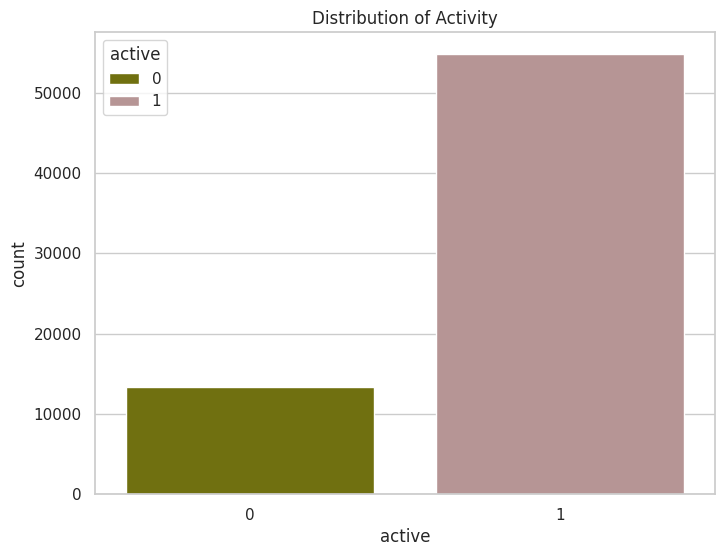

In [14]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("Set1")[:2]
plt.figure(figsize=(8, 6))
colors= ['olive', 'rosybrown']
sns.countplot(x='active',hue='active', data=df, palette=colors)
plt.title('Distribution of Activity')
plt.show()

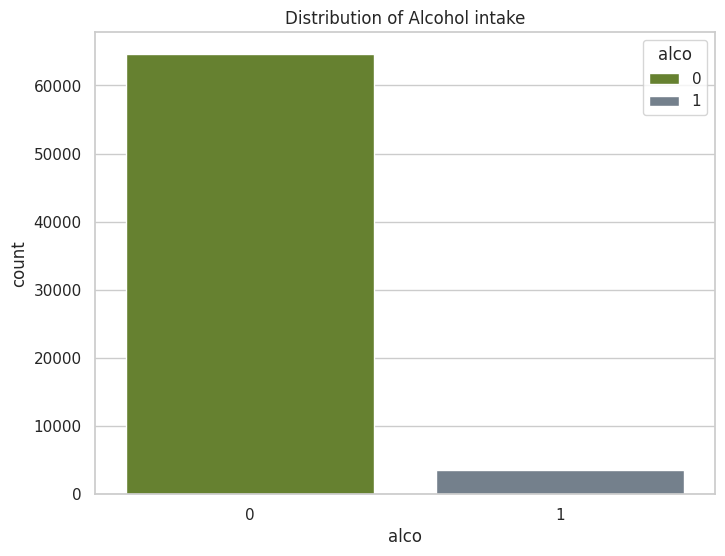

In [15]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("Set1")[:2]
plt.figure(figsize=(8, 6))
colors= ['olivedrab', 'slategrey']
sns.countplot(x='alco', hue='alco', data=df, palette=colors)
plt.title('Distribution of Alcohol intake')
plt.show()

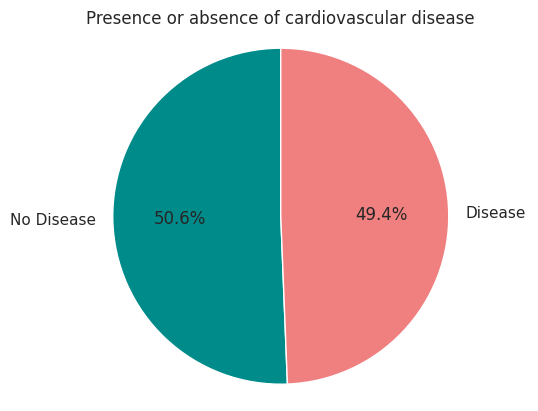

In [16]:
cardio_counts = df['cardio'].value_counts()
labels = ['No Disease', 'Disease']
colors = ['darkcyan', 'lightcoral']
plt.pie(cardio_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Presence or absence of cardiovascular disease')
plt.show()

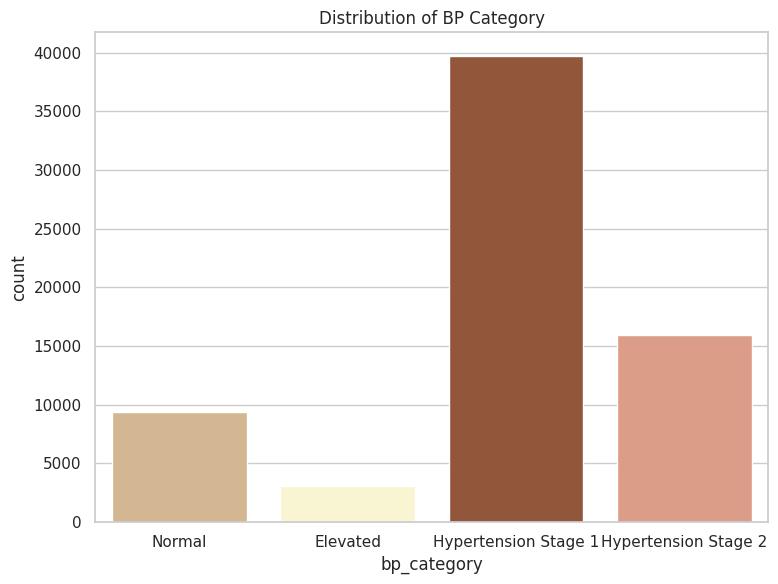

In [17]:
bp_category_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("Set2")[:4]
plt.figure(figsize=(8, 6))
colors= ['sienna', 'darksalmon', 'burlywood', 'lemonchiffon']
sns.countplot(x='bp_category', hue='bp_category', data=df, order=bp_category_order, palette=colors)
plt.title('Distribution of BP Category')
plt.tight_layout()
plt.show()

# EXPLORATIVE DATA ANALYSIS

## Outlier Detection

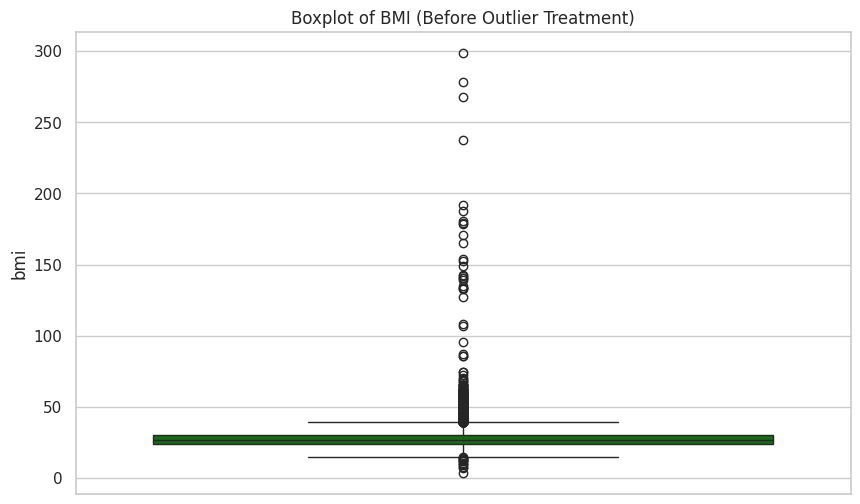

In [20]:
plt.figure(figsize=(10, 6))
import seaborn as sns
custom_palette = ['green']  
sns.set_palette(sns.color_palette(custom_palette))
sns.boxplot(y='bmi', data=df, orient='v')
plt.title('Boxplot of BMI (Before Outlier Treatment)')
plt.show()

In [21]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['bmi_category'] = df['bmi'].apply(lambda x: x if lower_bound <= x <= upper_bound else df['bmi'].median())

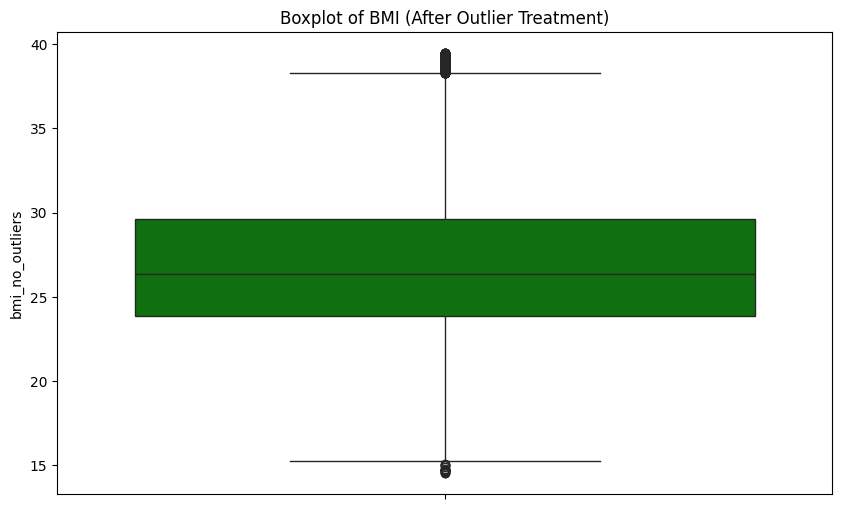

In [36]:
plt.figure(figsize=(10, 6))
import seaborn as sns
custom_palette = ['green']  
sns.set_palette(sns.color_palette(custom_palette))
sns.boxplot(y='bmi_no_outliers', data=df, orient='v')
plt.title('Boxplot of BMI (After Outlier Treatment)')
plt.show()

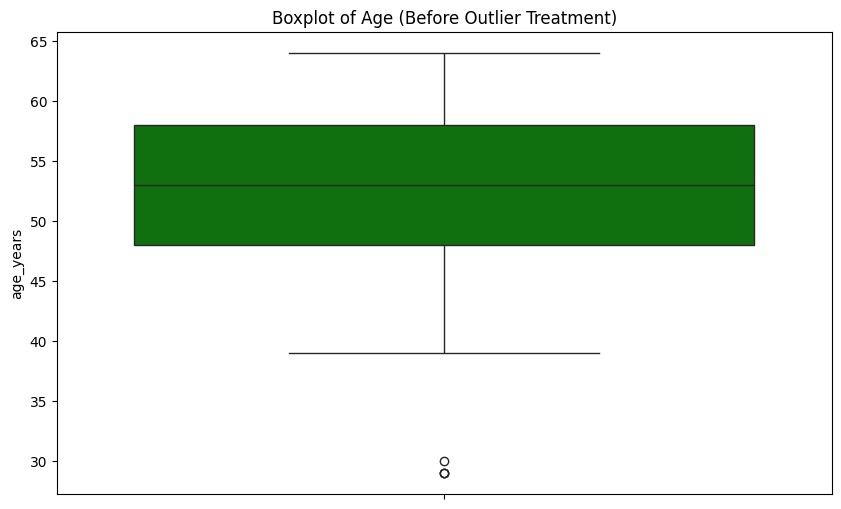

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='age_years', data=df, orient='v')
plt.title('Boxplot of Age (Before Outlier Treatment)')
plt.show()

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['age_years_no_outliers'] = df['age_'].apply(lambda x: x if lower_bound <= x <= upper_bound else df['bmi'].median())

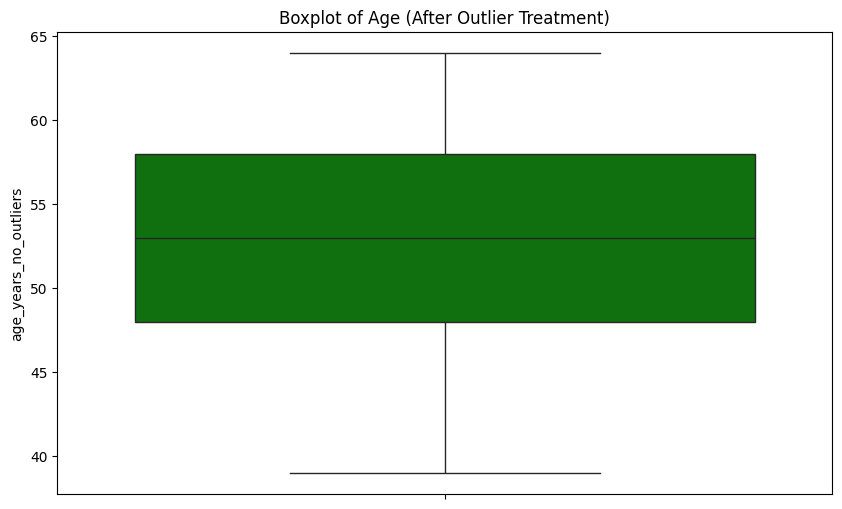

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='age_years_no_outliers', data=df, orient='v')
plt.title('Boxplot of Age (After Outlier Treatment)')
plt.show()

# TESTING FOR NORMALITY

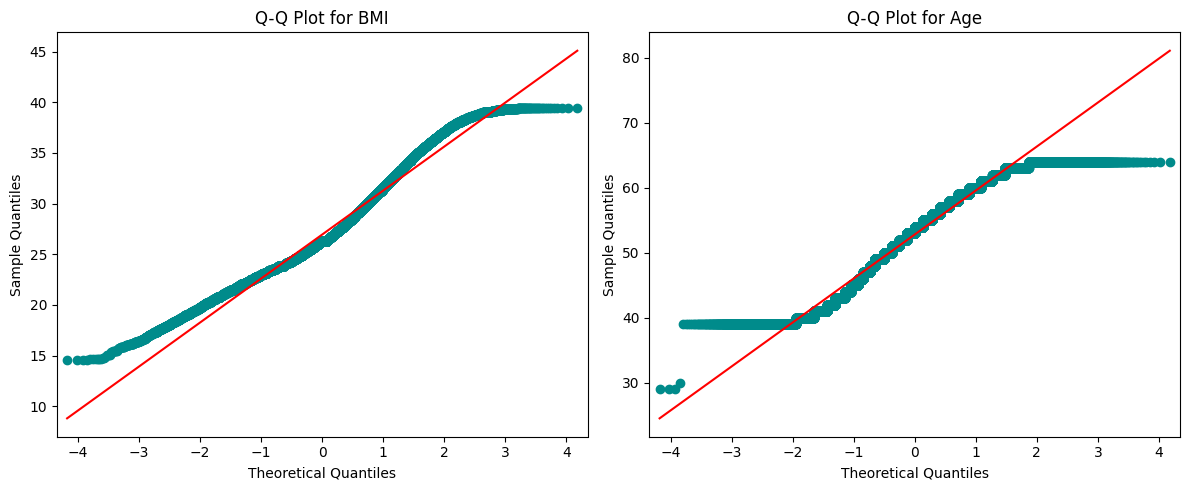

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

column_to_test_bmi = df['bmi_no_outliers']
custom_palette = ["darkcyan"]
sns.set_palette(sns.color_palette(custom_palette))
sm.qqplot(column_to_test_bmi, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for BMI')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

column_to_test_age = df['age_years']
custom_palette_age = ["darkcyan"]
sns.set_palette(sns.color_palette(custom_palette_age))
sm.qqplot(column_to_test_age, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Age')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

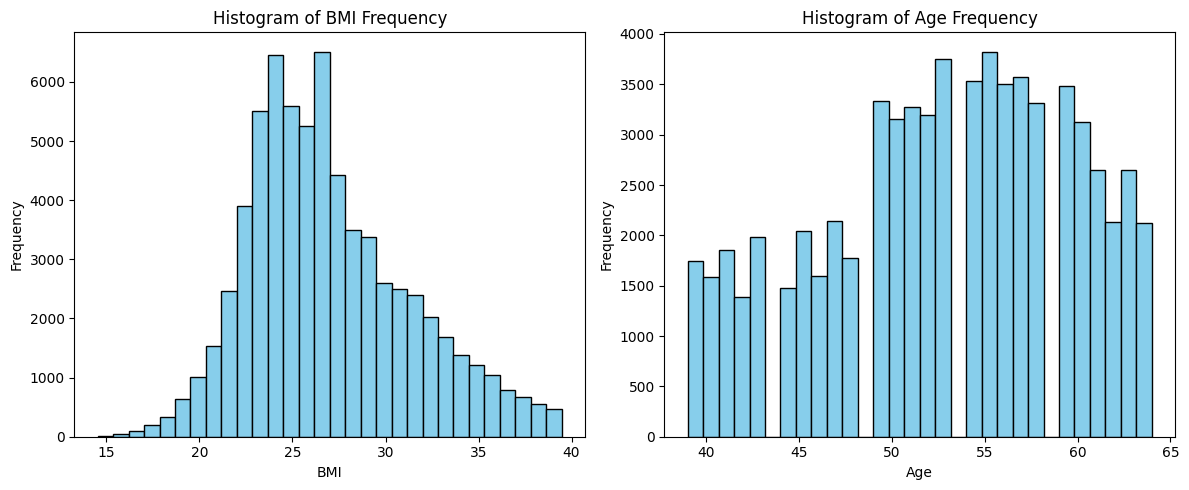

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(df['bmi_no_outliers'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of BMI Frequency')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['age_years_no_outliers'], bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Histogram of Age Frequency')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [44]:
column_to_test = df['bmi_no_outliers']
statistic, p_value = shapiro(column_to_test)
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")
warnings.filterwarnings('ignore', message="p-value may not be accurate for N > 5000.", category=UserWarning)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis (the data looks normally distributed)")
else:
    print("Reject the null hypothesis (the data does not look normally distributed)")

Shapiro-Wilk Statistic: 0.970792829990387
P-value: 0.0
Reject the null hypothesis (the data does not look normally distributed)


# Mann-Whitney U test 

In [28]:
group_0 = df[df['cardio'] == 0]['bmi_no_outliers']
group_1 = df[df['cardio'] == 1]['bmi_no_outliers']

u_statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 457324765.5
P-value: 0.0


In [45]:
group_0 = df[df['cardio'] == 0]['age_years']
group_1 = df[df['cardio'] == 1]['age_years']

u_statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 422600044.0
P-value: 0.0


## Chi-Square Test

In [10]:
from scipy.stats import chi2_contingency

columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender', 'bp_category_encoded', 'bmi_no_outliers', 'age_years']

for col in columns:
    contingency_table = pd.crosstab(df[col], df['cardio'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Column: {col}")
    print(f"Chi-Square Value: {chi2}")
    print(f"P-Value: {p}")
    if p < 0.05:
        print("There is a significant association.")
    else:
        print("There is no significant association.")
    print("\n")

Column: cholesterol
Chi-Square Value: 3324.753273153776
P-Value: 0.0
There is a significant association.


Column: gluc
Chi-Square Value: 565.3818397535067
P-Value: 1.693922018986708e-123
There is a significant association.


Column: smoke
Chi-Square Value: 18.60227993473503
P-Value: 1.6102785204559385e-05
There is a significant association.


Column: alco
Chi-Square Value: 5.490701397598927
P-Value: 0.019117871900750177
There is a significant association.


Column: active
Chi-Square Value: 98.00506011531229
P-Value: 4.173148025031213e-23
There is a significant association.


Column: gender
Chi-Square Value: 2.5103223423088847
P-Value: 0.11310279496800477
There is no significant association.


Column: bp_category_encoded
Chi-Square Value: 9487.649478634034
P-Value: 0.0
There is a significant association.


Column: bmi_no_outliers
Chi-Square Value: 5471.029803434476
P-Value: 2.425592749821744e-151
There is a significant association.


Column: age_years
Chi-Square Value: 4190.24779760389

# CORRELATION AMONG ATTRIBUTES

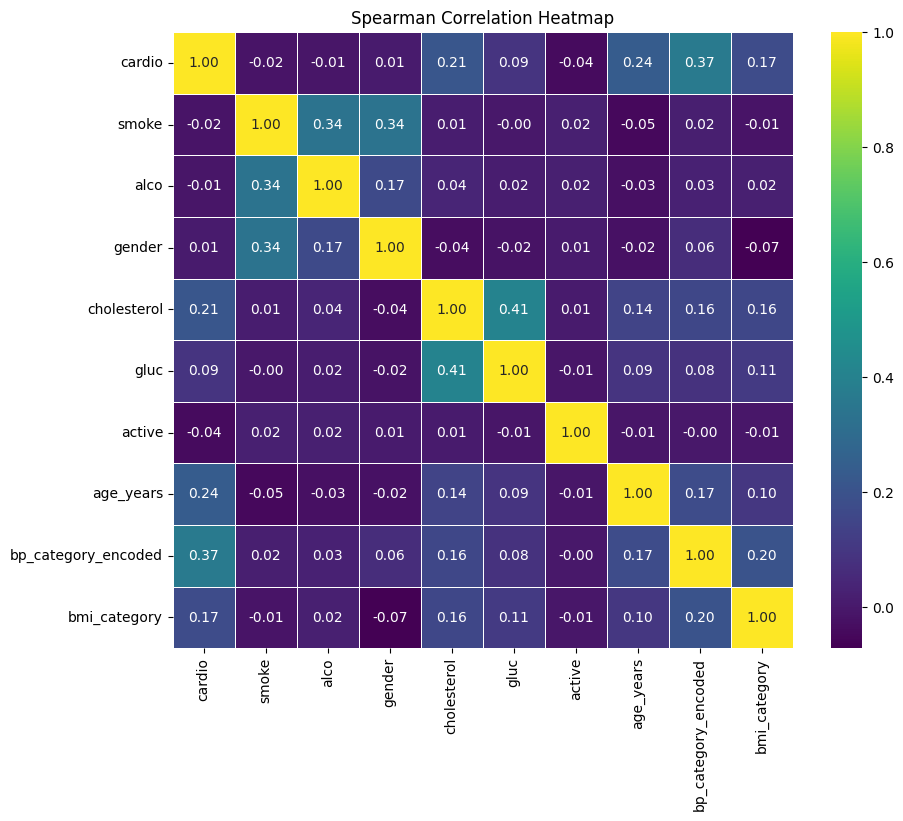

In [15]:
selected_columns = ['cardio', 'smoke', 'alco', 'gender', 'cholesterol', 'gluc', 'active','age_years','bp_category_encoded','bmi_category']
df_selected = df[selected_columns]

correlation_matrix = df_selected.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.savefig('Spearman Correlation Heatmap')
plt.show()

# DATA VISUALISATIONS

Spearman Correlation Coefficient: 0.2154709785168232
P-value: 0.0


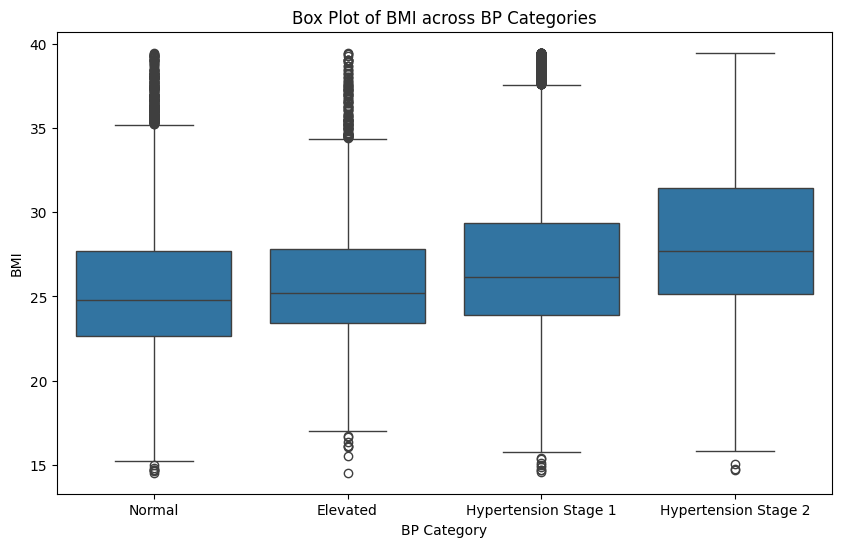

In [14]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df['bmi_no_outliers'], df['bp_category_encoded'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")
bp_category_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
plt.figure(figsize=(10, 6))
sns.boxplot(x='bp_category', y='bmi_no_outliers', data=df, order=bp_category_order)

plt.xlabel('BP Category')
plt.ylabel('BMI')
plt.title('Box Plot of BMI across BP Categories')
plt.show()

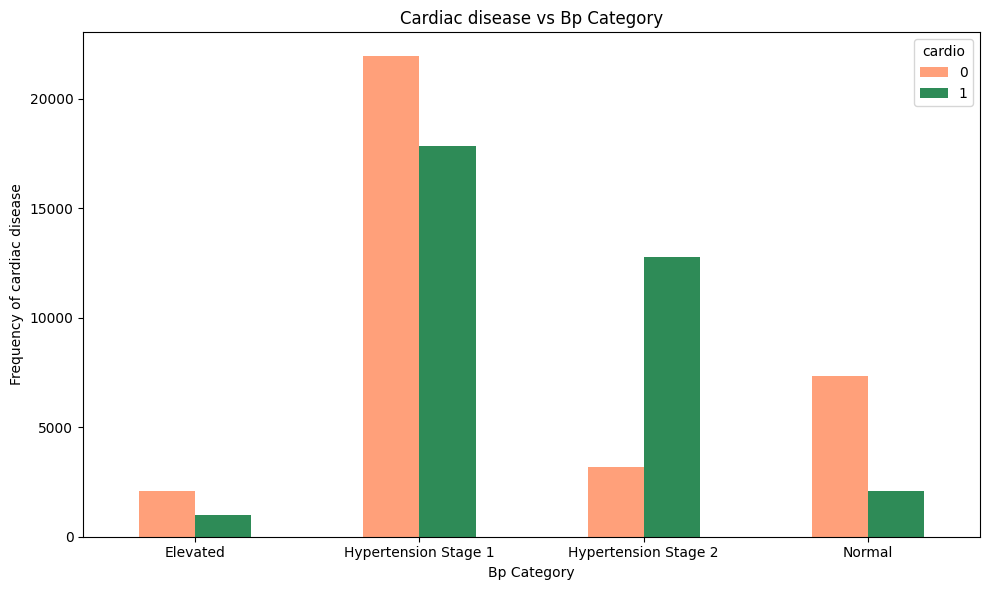

In [46]:
cross_tab = pd.crosstab(df['bp_category'], df['cardio'])
ax = cross_tab.plot(kind='bar', figsize=(10, 6), color=['lightsalmon', 'seagreen']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.title('Cardiac disease vs Bp Category')
plt.xlabel('Bp Category')
plt.ylabel('Frequency of cardiac disease')
plt.tight_layout()
plt.show()

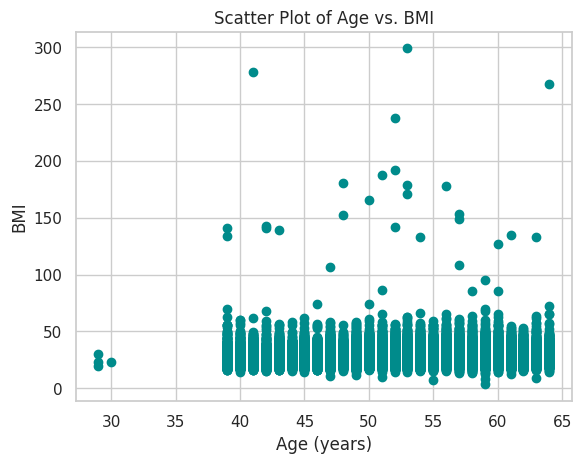

In [41]:
plt.scatter(df['age_years'], df['bmi'])
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.show()

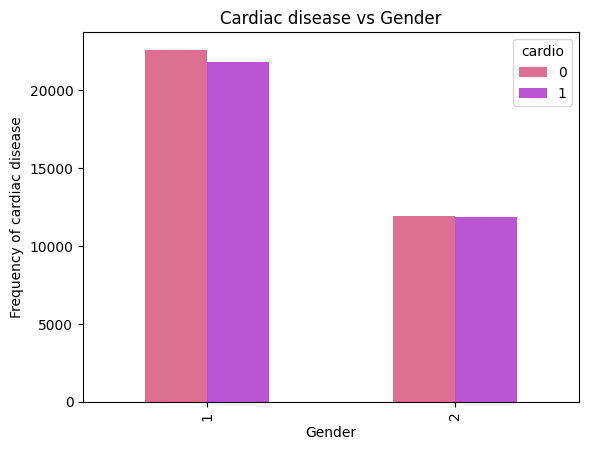

In [48]:
cross_tab = pd.crosstab(df['gender'], df['cardio'])
cross_tab.plot(kind='bar', color= ['palevioletred', 'mediumorchid'])

plt.title('Cardiac disease vs Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of cardiac disease')
plt.show()

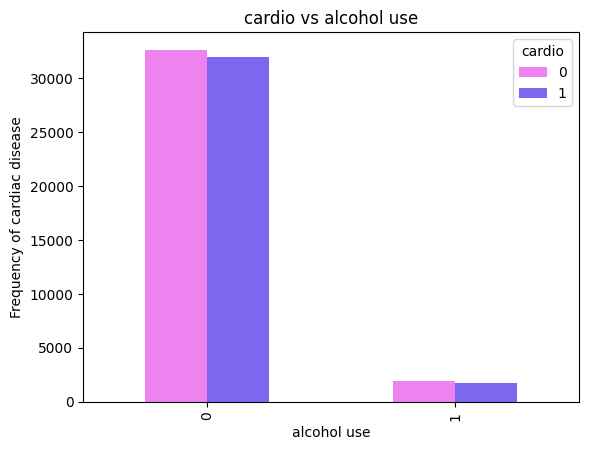

In [49]:
cross_tab = pd.crosstab(df['alco'], df['cardio'])
cross_tab.plot(kind='bar', color= ['violet', 'mediumslateblue'])

plt.title('cardio vs alcohol use')
plt.xlabel('alcohol use')
plt.ylabel('Frequency of cardiac disease')
plt.show()

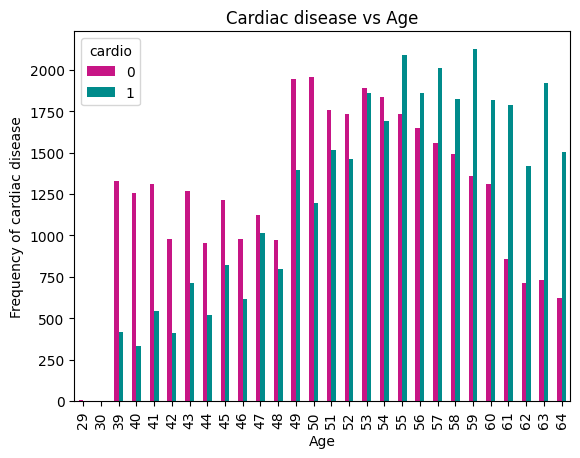

In [50]:
cross_tab = pd.crosstab(df['age_years'], df['cardio'])
cross_tab.plot(kind='bar', color= ['mediumvioletred', 'darkcyan'])

plt.title('Cardiac disease vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency of cardiac disease')
plt.show()

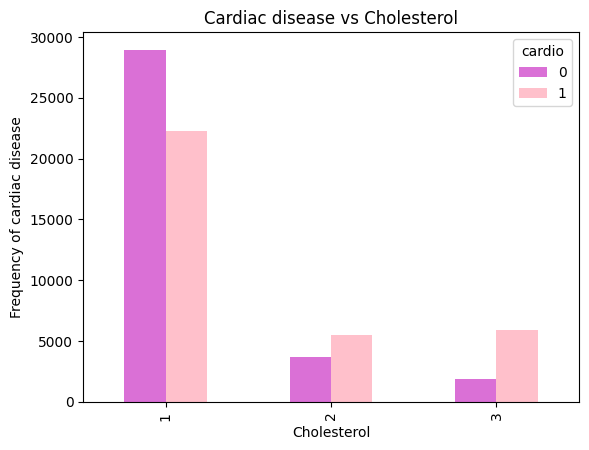

In [51]:
cross_tab = pd.crosstab(df['cholesterol'], df['cardio'])
cross_tab.plot(kind='bar', color= ['orchid', 'pink'])

plt.title('Cardiac disease vs Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency of cardiac disease')
plt.show()

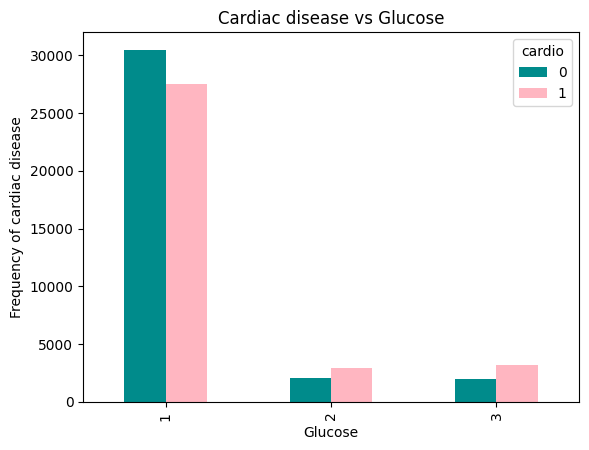

In [52]:
cross_tab = pd.crosstab(df['gluc'], df['cardio'])
cross_tab.plot(kind='bar', color= ['darkcyan', 'lightpink'])

plt.title('Cardiac disease vs Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency of cardiac disease')
plt.show()

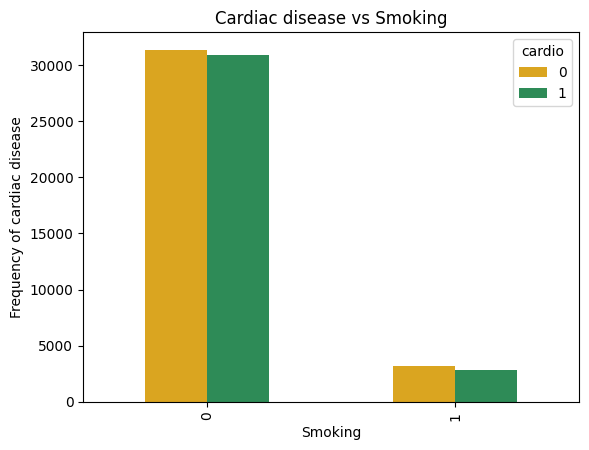

In [53]:
cross_tab = pd.crosstab(df['smoke'], df['cardio'])
cross_tab.plot(kind='bar', color= ['goldenrod', 'seagreen'])

plt.title('Cardiac disease vs Smoking')
plt.xlabel('Smoking')
plt.ylabel('Frequency of cardiac disease')
plt.show()

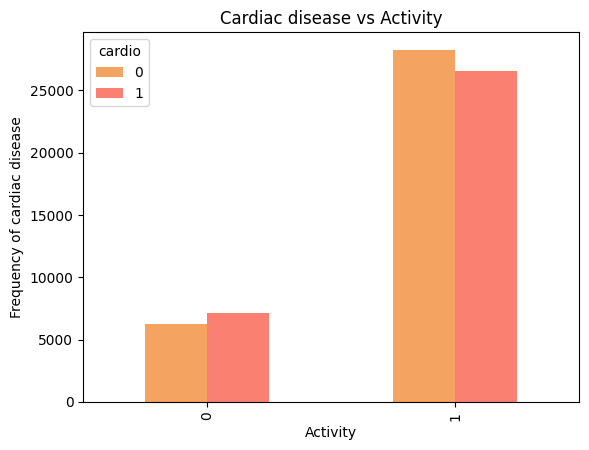

In [54]:
cross_tab = pd.crosstab(df['active'], df['cardio'])
cross_tab.plot(kind='bar', color=['sandybrown', 'salmon'])

plt.title('Cardiac disease vs Activity')
plt.xlabel('Activity')
plt.ylabel('Frequency of cardiac disease')
plt.show()

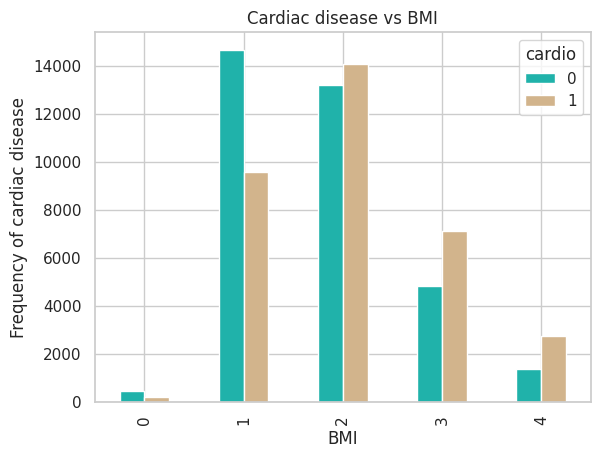

In [84]:
cross_tab = pd.crosstab(df['bmi_category'], df['cardio'])
cross_tab.plot(kind='bar', color= ['lightseagreen', 'tan'])
plt.title('Cardiac disease vs BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency of cardiac disease')
plt.show()

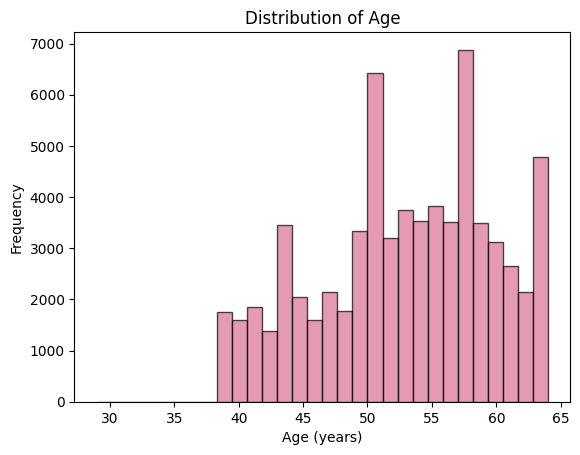

In [55]:
plt.hist(df['age_years'], bins=30, color='palevioletred', edgecolor='black', alpha=0.7)

plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

## logistic regression model

Confusion Matrix:
[[5365 1597]
 [2518 4161]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      6962
           1       0.72      0.62      0.67      6679

    accuracy                           0.70     13641
   macro avg       0.70      0.70      0.70     13641
weighted avg       0.70      0.70      0.70     13641



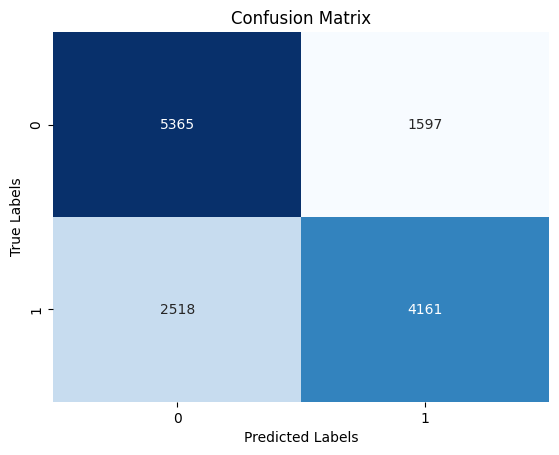

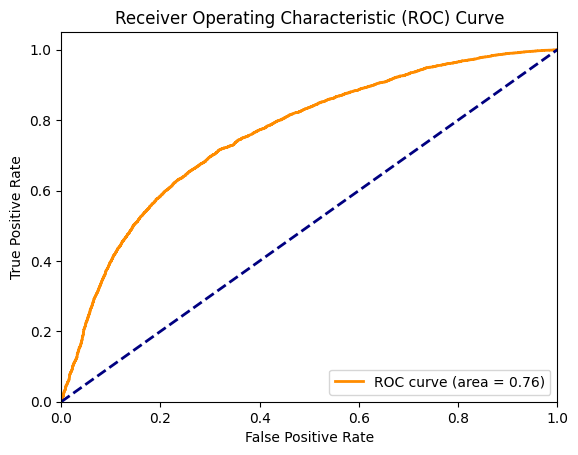

In [19]:
features = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_no_outliers', 'bp_category_encoded']
target = 'cardio'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['age_years', 'bmi_no_outliers']
numeric_transformer = StandardScaler()

categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category_encoded']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### KNN

[[4594 2368]
 [2396 4283]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6962
           1       0.64      0.64      0.64      6679

    accuracy                           0.65     13641
   macro avg       0.65      0.65      0.65     13641
weighted avg       0.65      0.65      0.65     13641



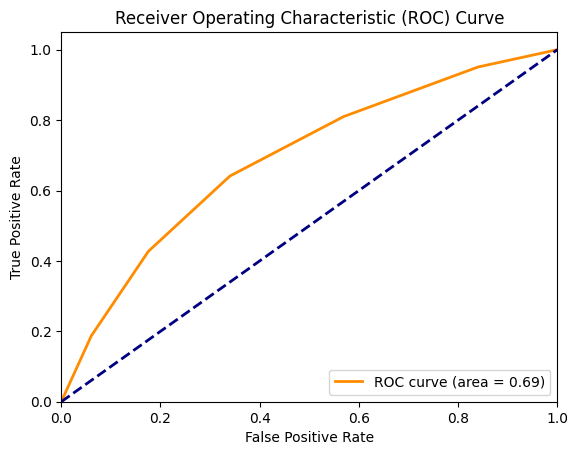

In [26]:
selected_columns = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'bp_category_encoded', 'cardio']
df_selected = df[selected_columns]
features = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'bp_category_encoded']
target = 'cardio'

X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_value = 5 
model_knn = KNeighborsClassifier(n_neighbors=k_value)
model_knn.fit(X_train_scaled, y_train)

y_pred = model_knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_prob = model_knn.predict_proba(X_test_scaled)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[5127 1835]
 [2539 4140]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      6962
           1       0.69      0.62      0.65      6679

    accuracy                           0.68     13641
   macro avg       0.68      0.68      0.68     13641
weighted avg       0.68      0.68      0.68     13641



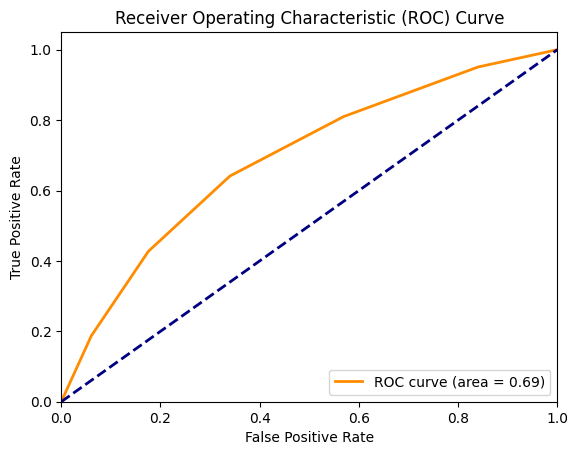

In [27]:
selected_columns = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'bp_category_encoded', 'cardio']
df_selected = df[selected_columns]
features = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'bp_category_encoded']
target = 'cardio'

X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

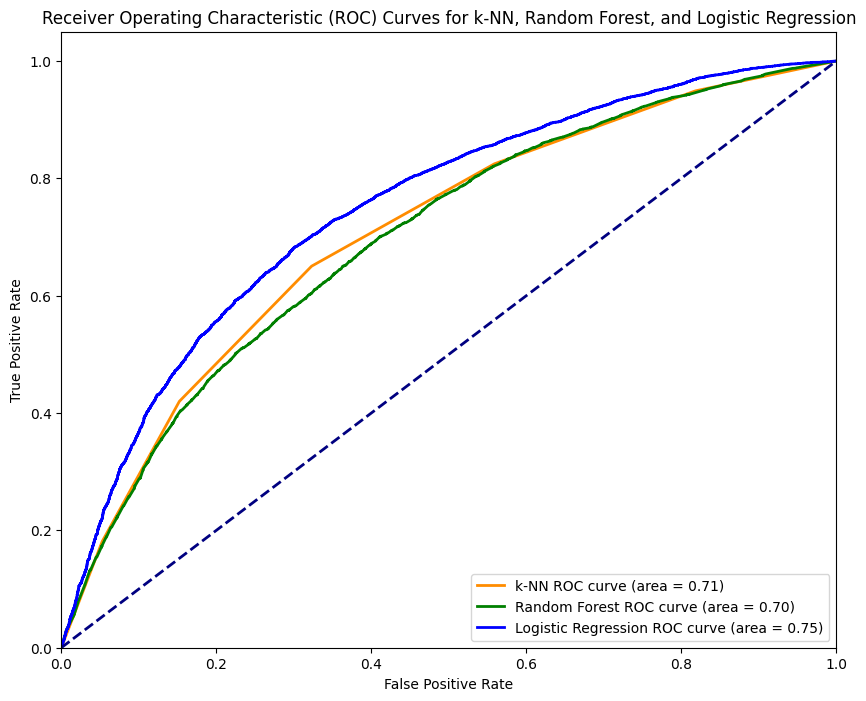

In [35]:

selected_columns = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_no_outliers', 'bp_category_encoded', 'cardio']
df_selected = df[selected_columns]
features = ['age_years', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_no_outliers', 'bp_category_encoded']
target = 'cardio'

X = df_selected[features]
y = df_selected[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors
k_value = 5 
model_knn = KNeighborsClassifier(n_neighbors=k_value)
model_knn.fit(X_train_scaled, y_train)

y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]  
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

y_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting ROC curves for all three models
plt.figure(figsize=(10, 8))

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='k-NN ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for k-NN, Random Forest, and Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('combined_ROC.png')
plt.show()